#**Murtaj Sheikh Mohammad Tahsin**
#**1817537**
# **Test 2**


In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 199 kB 36.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=3b16eaa31a71b840413fd82195e224ee26621688078b24d9fee33466bbb7390b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [40]:
import numpy as np
import pandas as pd
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col, isnull, asc, desc, mean, lit, size\
, array_contains, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [3]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [65]:
## set the size of all figures
plt.rcParams['figure.figsize'] = [16, 9]

In [53]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
'''Create a spark session'''
spark = SparkSession.builder.master("local").appName("DataWrangling").getOrCreate()
'''Set this configuration to get output similar to pandas'''
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

'Create a spark session'

'Set this configuration to get output similar to pandas'

In [5]:
df1 = spark.read.csv("survey data demographics.csv", header=True)

In [56]:
df2 = pd.read_csv("survey data technologies normalised.csv")

In [6]:
df1.na.drop(how="any").show()



+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+--------------------+--------------------+----------+----------------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------

In [12]:
df1.groupBy('Gender').count()

Gender,count
Man,10480
null,73
"Man;Non-binary, g...",26
Woman;Man,9
Woman;Man;Non-bin...,2
"Woman;Non-binary,...",14
"Non-binary, gende...",63
Woman,731


In [7]:
'''Find the count of missing values'''
df1.select([count(when(isnull(column), column)).alias(column) for column in df1.columns])

'Find the count of missing values'

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,0,0,0,81,0,0,51,112,737,164,96,65,9,13,16,0,1,493,497,493,0,0,413,37,3,39,0,0,809,206,816,122,121,164,8,32,5,1,2426,29,196,38,98,35,38,293,20,507,325,5,1,3,50,1917,1,1128,6,5,0,85,1965,287,73,123,542,675,140,19,14


In [11]:
df1.select([count(when(isnull(column), column)).alias(column) for column in df1.columns])

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,0,0,0,81,0,0,51,112,737,164,96,65,9,13,16,0,1,493,497,493,0,0,413,37,3,39,0,0,809,206,816,122,121,164,8,32,5,1,2426,29,196,38,98,35,38,293,20,507,325,5,1,3,50,1917,1,1128,6,5,0,85,1965,287,73,123,542,675,140,19,14


In [12]:
ranked_underGradMajor_df1 = df1.select(df1.UndergradMajor, df1.Respondent) \
    .distinct() \
    .groupBy(df1.UndergradMajor) \
    .count() \
    .orderBy("count", ascending=False)

In [13]:
ranked_underGradMajor_df1.collect()[:5]

[Row(UndergradMajor='Computer science, computer engineering, or software engineering', count=6953),
 Row(UndergradMajor='Information systems, information technology, or system administration', count=794),
 Row(UndergradMajor='Another engineering discipline (ex. civil, electrical, mechanical)', count=759),
 Row(UndergradMajor=None, count=737),
 Row(UndergradMajor='Web development or web design', count=410)]

In [31]:
ranked_underGradMajor_df1

UndergradMajor,count
"Computer science,...",6953
Information syste...,794
Another engineeri...,759
null,737
Web development o...,410
A natural science...,403
Mathematics or st...,372
A business discip...,244
A social science ...,210
A humanities disc...,207


In [14]:
ranked_underGradMajor_df1_new = ranked_underGradMajor_df1.filter(
    (ranked_underGradMajor_df1.UndergradMajor != " "))

In [15]:
ranked_underGradMajor_df1_new

UndergradMajor,count
"Computer science,...",6953
Information syste...,794
Another engineeri...,759
Web development o...,410
A natural science...,403
Mathematics or st...,372
A business discip...,244
A social science ...,210
A humanities disc...,207
Fine arts or perf...,161


In [18]:
ranked_underGradMajor_df1_new_pd = ranked_underGradMajor_df1_new.toPandas()

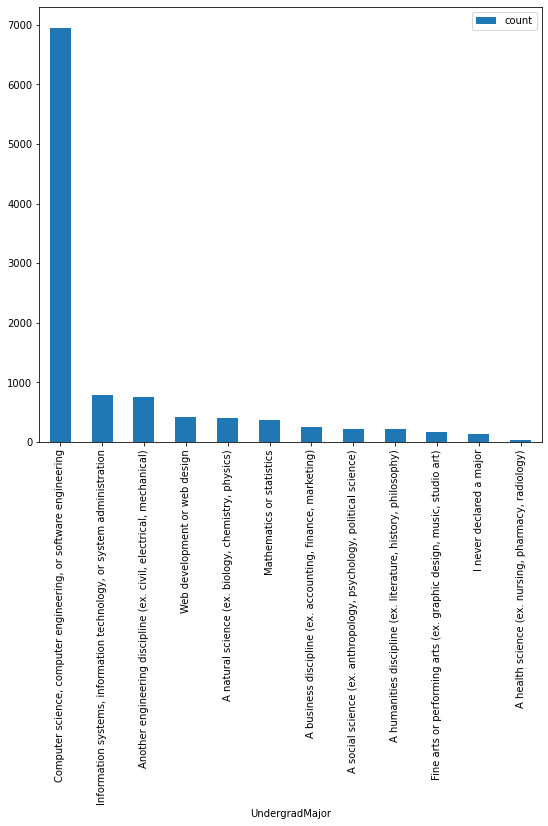

In [20]:
ranked_underGradMajor_df1_new_pd.plot(x="UndergradMajor", y=["count"], kind="bar", figsize=(9, 8))
 

In [22]:
df1.groupBy('Country').count()


Country,count
Côte d'Ivoire,5
Paraguay,4
The former Yugosl...,7
Yemen,1
Senegal,2
Sweden,162
Hong Kong (S.A.R.),34
Republic of Korea,1
Philippines,36
Singapore,33


In [46]:
def udf_multi(country):
  if( country == "Côte d'Ivoire	" or country == "Senegal" or country == "Rwanda" or country == "Sudan"):
    return "Africa"
  elif(country == "The former Yugoslav Republic of Macedonia" or country == "Sweden" or country == "Germany" or country == "France" ):
    return "Europe"
  elif(country == "Turkey" or country == "Yemen" or country == "Iraq" or country == "Jordan" ):
    return "Middle East"
  elif(country == "India" or country == "Bangladesh" or country == "Hong Kong (S.A.R.)" or \
       country == "Phillipines" or country == "Singapore" or country == "Malaysia" or country == "Pakistan" or country == "Japan" or country == "China"):
    return "South Asia and Southeast Asia" 

In [47]:
country_udf = udf(udf_multi)
df1 = df1.withColumn('country_udf', country_udf('Country'))

In [48]:
df1.show()

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+--------------------+--------------------+----------+----------------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+-

In [49]:
country_udf_df1 = df1.groupBy('country_udf').count()


In [50]:
country_udf_df1

country_udf,count
Europe,1216
Africa,5
null,8797
South Asia and So...,1275
Middle East,105


In [51]:
country_udf_df1_new = country_udf_df1.filter(
    (country_udf_df1.country_udf != " "))

In [31]:
country_udf_df1_new_pd = country_udf_df1_new.toPandas()

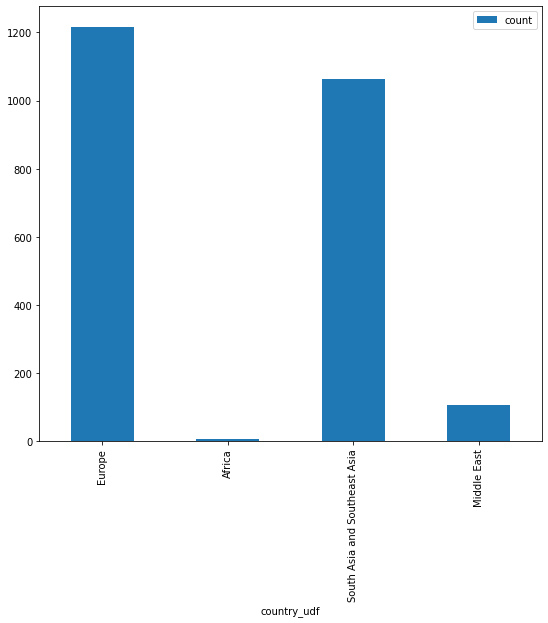

In [32]:
country_udf_df1_new_pd.plot(x="country_udf", y=["count"], kind="bar", figsize=(9, 8))

In [ ]:
df1.select('YearsCode').distinct().show(truncate=False)

In [42]:
df1.agg(F.max(F.abs(df1.YearsCode))).first()[0]

50.0

In [43]:
df1.agg(F.min(F.abs(df1.YearsCode))).first()[0]

1.0

In [45]:
df1.agg(F.max(df1.YearsCode)).first()[0]

'Less than 1 year'

In [60]:
job_satisfaction_df1 = df1.select(["Country","JobSat"]).where(df1.CareerSat=="Very satisfied")


In [61]:
job_satisfaction_df1_pd = job_satisfaction_df1.toPandas() 

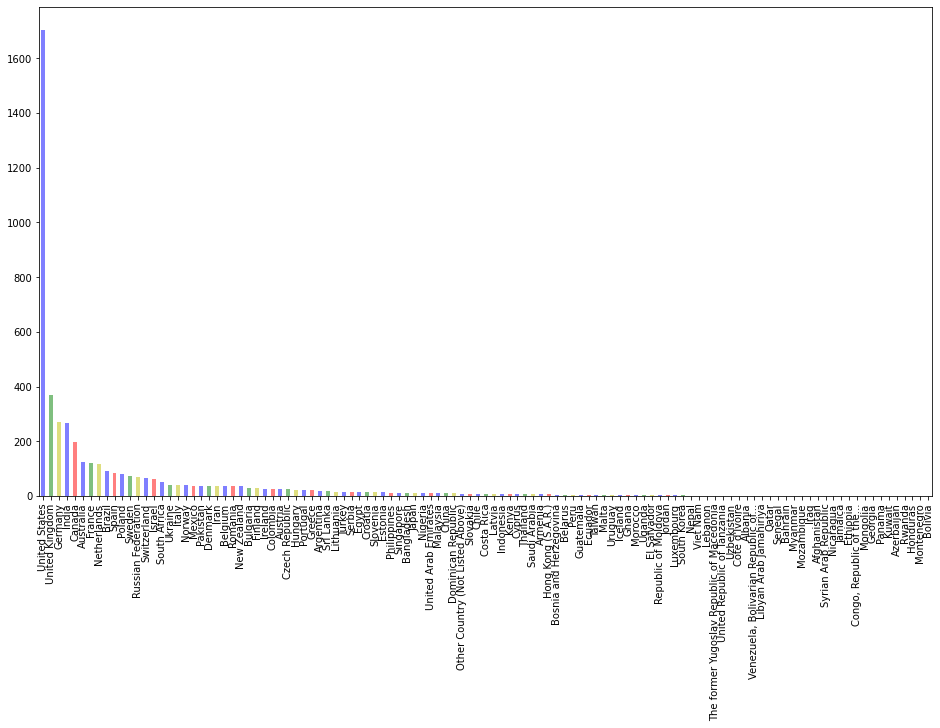

In [66]:
alpha_color = 0.5
job_satisfaction_df1_pd['Country'].value_counts().plot(kind='bar',color=['b','g','y','b','r'],alpha=alpha_color)

***survey data technologies normalised Dataset***

In [58]:
df2['LanguageWorkedWith'] = df2["LanguageWorkedWith"].fillna(df2['LanguageWorkedWith'].mode()[0])
df2['LanguageDesireNextYear'] = df2["LanguageDesireNextYear"].fillna(df2['LanguageDesireNextYear'].mode()[0])
df2['DatabaseDesireNextYear'] = df2["DatabaseDesireNextYear"].fillna(df2['DatabaseDesireNextYear'].mode()[0])
df2['PlatformWorkedWith'] = df2["PlatformWorkedWith"].fillna(df2['PlatformWorkedWith'].mode()[0])
df2['WebFrameWorkedWith'] = df2["WebFrameWorkedWith"].fillna(df2['WebFrameWorkedWith'].mode()[0])
df2['PlatformDesireNextYear'] = df2["PlatformDesireNextYear"].fillna(df2['PlatformDesireNextYear'].mode()[0])
df2['WebFrameDesireNextYear'] = df2["WebFrameDesireNextYear"].fillna(df2['WebFrameDesireNextYear'].mode()[0])
df2['DevEnviron'] = df2["DevEnviron"].fillna(df2['DevEnviron'].mode()[0])

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

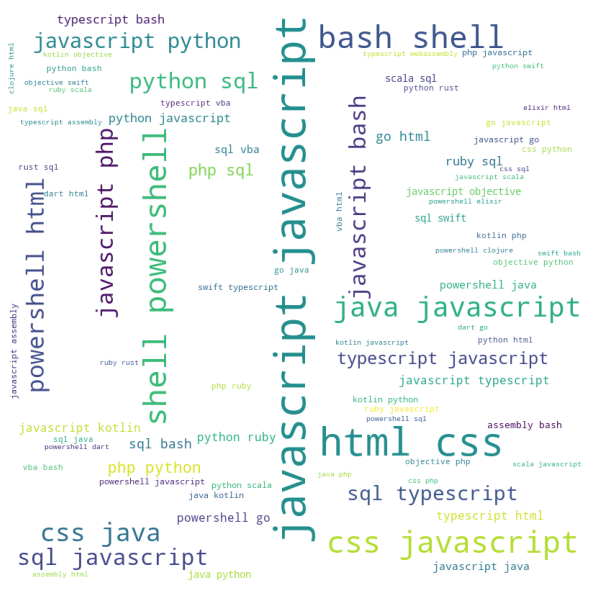

In [59]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df2.LanguageWorkedWith:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()